In [5]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.read_edgelist('facebook_combined.txt')

print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Is the graph directed: {G.is_directed()}")
print(f"Graph density: {nx.density(G)}")

start_node = '0'  # Example start node
goal_node = '100'

# Enure start_node and goal_node are in the graph
if start_node not in G or goal_node not in G:
    raise ValueError("Start or goal node not in graph")

Number of nodes: 4039
Number of edges: 88234
Is the graph directed: False
Graph density: 0.010819963503439287


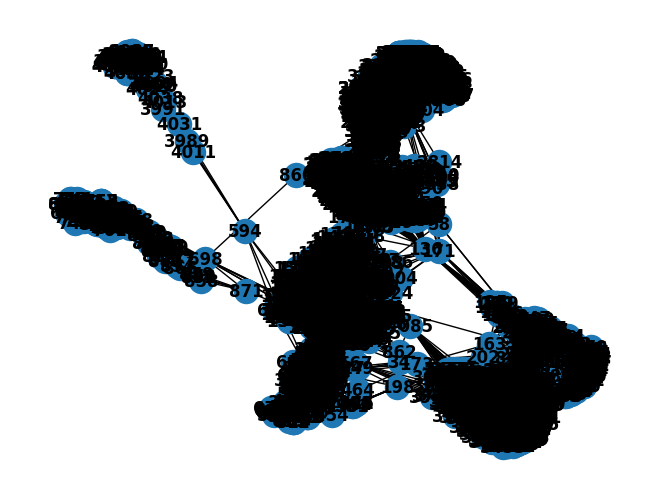

In [6]:
nx.draw(G, with_labels=True, font_weight='bold')

In [26]:

from collections import deque
visited=[]
def dfs(s):
    visited.clear()
    stack=deque()
    stack.append(s)
    visited.append(s)
    while(stack):
        a=stack.pop()
        L=list(G.adj[a])
        for i in L:
            if(i not in visited):
                stack.append(i)
                visited.append(i)

    print("\nNodes traversed for finding a particular node =",len(visited))
    return


In [ ]:
dfs("1","100")


Nodes traversed for finding a particular node = 3810


In [20]:

def vis_dfs():
    plt.figure(figsize=(10, 8))
    sub=G.subgraph(visited)
    pos = nx.spring_layout(sub,iterations=200)
    p=nx.draw(sub ,4pos=pos,with_labels=True,font_weight='bold',alpha=0.9)
    # nx.draw_networkx_nodes(sub, pos, nodelist=path, node_color='gold', node_size=500,alpha=1)
    plt.title("Traversed nodes with highlighted shortest path")


In [13]:

from collections import deque
visited=[]
path=[]
pred={}
def bfs(s,d):
    visited.clear()
    path.clear()
    pred.clear()
    queue=deque()
    queue.append(s)
    visited.append(s)
    pred[s]=None
    while(queue):
        a=queue.popleft()
        #print(a,end="->")
        if(a==d):
            while a is not None:
                path.append(a)
                a = pred[a]
            path.reverse()

            break
        L=list(G.adj[a])
        for i in L:
            if(i not in visited):
                queue.append(i)
                visited.append(i)
                pred[i]=a
    st="->".join(path)
    print("Shortest path:", " -> ",st)
    print("Length of shortest path =",len(path),"\nNodes traversed for finding shortest path =",len(visited))
    return



In [19]:
import matplotlib.pyplot as plt
def vis_bfs():
    plt.figure(figsize=(10, 8))
    sub=G.subgraph(visited)
    pos = nx.spring_layout(sub,iterations=200)
    node_sizes = [800 if node in path else 400 for node in sub.nodes()]
    p=nx.draw(sub ,pos=pos,with_labels=True,font_weight='bold',alpha=0.7,node_size=node_sizes)
    plt.title("Traversed nodes with highlighted shortest path")
    plt.legend(handles=[
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gold', markersize=10, label='Shortest Path'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Other traversed Nodes')
    ], loc='upper left')
    nx.draw_networkx_nodes(sub, pos, nodelist=path, node_color='gold', node_size=500,alpha=1)
    plt.show()
    return

In [15]:
import time
def fn2():
    a=input("Enter source node: ")
    b=input("Enter destination node:")
    start_time = time.time()
    bfs(a,b)
    end_time = time.time()
    bfs_time = end_time - start_time
    print("BFS took",bfs_time,"seconds")
    vis_bfs()


Enter source node: 5
Enter destination node:6
Shortest path:  ->  5->0->6
Length of shortest path = 3 
Nodes traversed for finding shortest path = 348
BFS took 0.007563352584838867 seconds


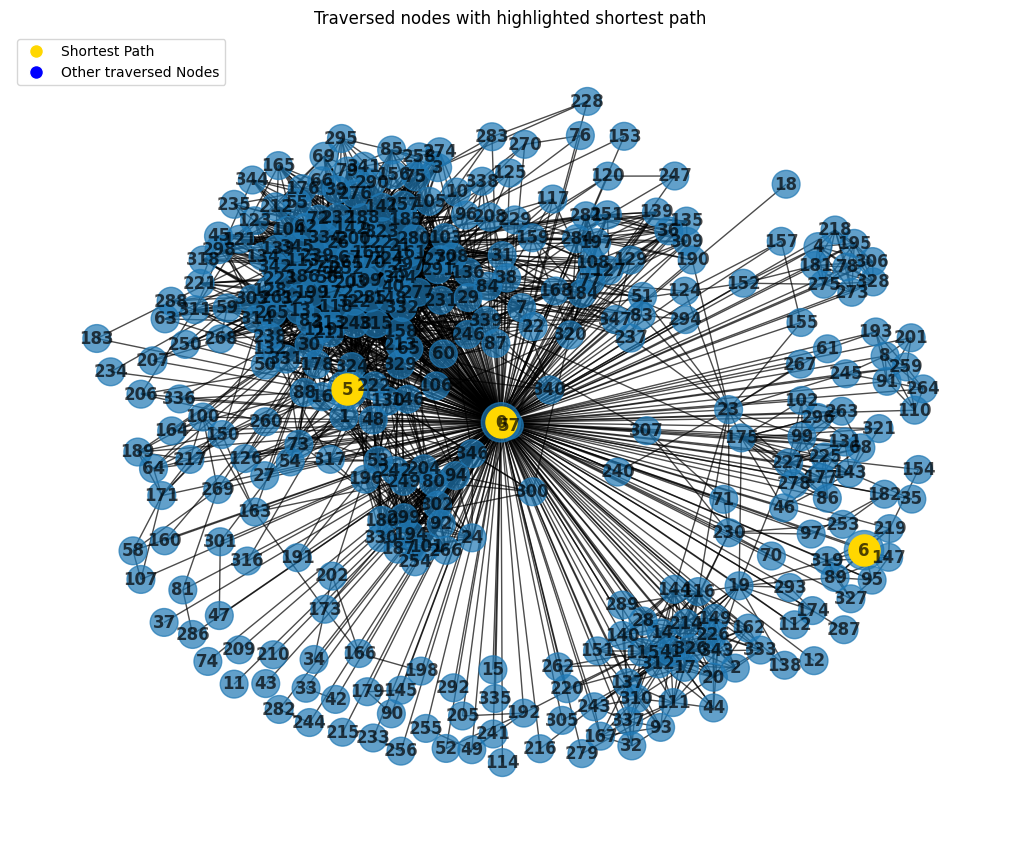

In [ ]:
fn2()

In [28]:
def fn3():
    a=input("Enter source node: ")
    start_time = time.time()
    dfs(a)
    end_time = time.time()
    dfs_time = end_time - start_time
    print("DFS took",dfs_time,"seconds")
    vis_dfs()

1.Visualize graph
2.Find shortest path with bfs
3.Explore with dfs
4.Exit
Enter your choice: 2
Enter source node: 1
Enter destination node:107
Shortest path:  ->  1->0->107
Length of shortest path = 3 
Nodes traversed for finding shortest path = 359
BFS took 0.01177835464477539 seconds
Enter your choice: 4


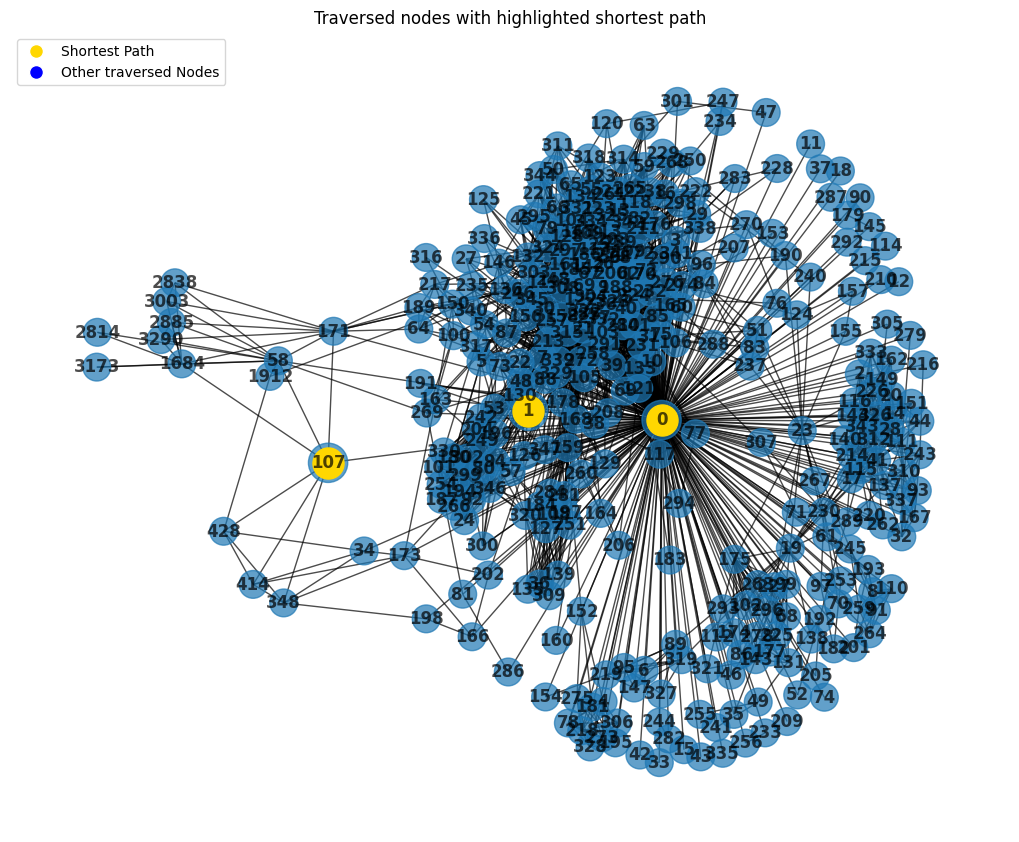

1.Visualize graph
2.Find shortest path with bfs
3.Explore with dfs
4.Exit


In [29]:
while True:
    print("1.Visualize graph\n2.Find shortest path with bfs\n3.Explore with dfs\n4.Exit")
    ch=int(input("Enter your choice: "))
    if(ch==1):
        nx.draw(G, with_labels=True, font_weight='bold')
        plt.show()
    elif(ch==2):
        fn2()
    elif(ch==3):
        fn3()
    elif(ch==4):
        break
    else:
        print("Invalid choice")